In [1]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Load the two CSV files
file1 = "../L2/data/barttorvik_predict2025_L2.csv"
file2 = "../L2/data/barttorvik_predict2025NN_L2.csv"
file3 = "data/vegasOdds_L1.csv"

df = pd.read_csv(file1)
df_NN = pd.read_csv(file2)
df_vegas = pd.read_csv(file3)

# Display first few rows of each file
display(df.head(), df_NN.head(), df_vegas.head())

,Unnamed: 0,Team,RF_Prob,predict_E8_RF,KNN_Prob,predict_E8_KNN,XGB_Prob,predict_E8_XGB
0,6,Texas Tech,0.965608,1,1.000000,1,0.873618,1
1,1,Duke,0.973436,1,1.000000,1,0.870313,1
2,3,Florida,0.942231,1,0.587274,1,0.865396,1
3,2,Auburn,0.965279,1,1.000000,1,0.842549,1
4,4,Alabama,0.949181,1,1.000000,1,0.805204,1


,Team,Elite 8 Probability,Elite 8 Prediction
0,Clemson,0.915290,1
1,Saint Mary's,0.775748,1
2,Michigan St.,0.562898,1
3,Tennessee,0.515792,1
4,Texas A&M,0.514945,1


,Unnamed: 0,Team,Vegas_Prob
0,0,Duke,0.7368
1,1,Florida,0.7059
2,2,Auburn,0.6774
3,3,Houston,0.5918
4,4,Tennessee,0.5000


In [3]:
df_vegas = df_vegas.drop(columns=["Unnamed: 0"])

In [4]:
# Merge on "Team" column
merged_df = pd.merge(df, df_NN, on="Team", how="inner")  # Ensures only common teams are included


In [5]:
merged_df = merged_df.drop(columns=["Unnamed: 0"])

# Rename columns
rename_mapping = {
    "Elite 8 Probability": "NN_Prob",
    "Elite 8 Prediction": "predict_E8_NN"
}

merged_df = merged_df.rename(columns=rename_mapping)

# Display the merged result
display(merged_df.head(5))

,Team,RF_Prob,predict_E8_RF,KNN_Prob,predict_E8_KNN,XGB_Prob,predict_E8_XGB,NN_Prob,predict_E8_NN
0,Texas Tech,0.965608,1,1.000000,1,0.873618,1,0.125972,0
1,Duke,0.973436,1,1.000000,1,0.870313,1,0.388653,0
2,Florida,0.942231,1,0.587274,1,0.865396,1,0.126925,0
3,Auburn,0.965279,1,1.000000,1,0.842549,1,0.171132,0
4,Alabama,0.949181,1,1.000000,1,0.805204,1,0.282170,0


In [6]:
merged_df["Ensemble_Prob"] = (
    0.10 * merged_df["RF_Prob"] + 
    0.05 * merged_df["KNN_Prob"] + 
    0.65 * merged_df["XGB_Prob"] + 
    0.20 * merged_df["NN_Prob"]
)

In [7]:
# Convert to csv

# Sort by Ensemble_Prob in descending order
merged_df = merged_df.sort_values(by="Ensemble_Prob", ascending=False)
merged_df.to_csv("../L2/data/barttorvik_ensemblePredict2025_L2.csv")

In [8]:
# Keep only Team and Ensemble_Prob columns in ensemble_df
merged_df = merged_df[["Team", "Ensemble_Prob"]]

# Display the filtered DataFrame
display(merged_df)
display(merged_df.info())

,Team,Ensemble_Prob
1,Duke,0.790778
5,Tennessee,0.754702
0,Texas Tech,0.739607
3,Auburn,0.728411
4,Alabama,0.724735
...,...,...
46,UC San Diego,0.015389
52,Colorado St.,0.014353
59,Wofford,0.011600
66,Saint Francis,0.009222


<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 1 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           68 non-null     object 
 1   Ensemble_Prob  68 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

In [9]:
merged_df = merged_df.merge(df_vegas, on="Team", how="left")

# Fill NaN values in "Implied Probability" with 0.005 and ensure it's a float
merged_df["Vegas_Prob"] = merged_df["Vegas_Prob"].fillna(0.005).astype(float)


In [10]:
merged_df["VEGsemble_Prob"] = (0.65 * merged_df["Ensemble_Prob"]) + (0.35 * merged_df["Vegas_Prob"])

In [11]:
merged_df = merged_df.sort_values(by="VEGsemble_Prob", ascending=False)

merged_df['Team'] = merged_df['Team'].replace('Michigan St.', 'Michigan State')

merged_df['Team'] = merged_df['Team'].replace('Mississippi St.', 'Mississippi State')
merged_df['Team'] = merged_df['Team'].replace('Utah St.', 'Utah State')
merged_df['Team'] = merged_df['Team'].replace('Iowa St.', 'Iowa State')
merged_df['Team'] = merged_df['Team'].replace('Colorado St.', 'Colorado State')
merged_df['Team'] = merged_df['Team'].replace('McNeese St.', 'McNeese State')
merged_df['Team'] = merged_df['Team'].replace('Alabama St.', 'Alabama State')
merged_df['Team'] = merged_df['Team'].replace('Norfolk St.', 'Norfolk State')
merged_df['Team'] = merged_df['Team'].replace('San Diego St.', 'San Diego State')
merged_df['Team'] = merged_df['Team'].replace('Nebraska Omaha', 'Omaha')
merged_df['Team'] = merged_df['Team'].replace('UNC Wilmington', 'NC Wilmington')
merged_df['Team'] = merged_df['Team'].replace('Saint Francis', 'Saint Francis (PA)')

merged_df.to_csv("../L2/data/barttorvik_VEGsemblePredict2025_L2.csv")

# Display the filtered DataFrame
display(merged_df)

,Team,Ensemble_Prob,Vegas_Prob,VEGsemble_Prob
0,Duke,0.790778,0.7368,0.771885
3,Auburn,0.728411,0.6774,0.710557
5,Florida,0.711479,0.7059,0.709526
1,Tennessee,0.754702,0.5000,0.665557
4,Alabama,0.724735,0.4545,0.630153
...,...,...,...,...
62,Troy,0.017887,0.0099,0.015092
59,McNeese State,0.020083,0.0050,0.014804
65,Wofford,0.011600,0.0099,0.011005
66,Saint Francis (PA),0.009222,0.0050,0.007744


In [12]:
##############
# This is Elite 8 Finals
##############

df_VEGsemble = merged_df.copy()

from IPython.display import display, Markdown

# Define the threshold value
VEGsemble_threshold = 0.4  # Adjust this value as needed

# Create ensemble_df with only rows meeting the threshold condition
df_VEGsemble = df_VEGsemble[df_VEGsemble["VEGsemble_Prob"] >= VEGsemble_threshold].copy()

# Display the title
display(Markdown("## 🚀🚀🚀 Ryan's VEGsemble Elite 8 🚀🚀🚀"))

# Display the filtered and sorted DataFrame
display(df_VEGsemble)

## 🚀🚀🚀 Ryan's VEGsemble Elite 8 🚀🚀🚀

,Team,Ensemble_Prob,Vegas_Prob,VEGsemble_Prob
0,Duke,0.790778,0.7368,0.771885
3,Auburn,0.728411,0.6774,0.710557
5,Florida,0.711479,0.7059,0.709526
1,Tennessee,0.754702,0.5000,0.665557
4,Alabama,0.724735,0.4545,0.630153
2,Texas Tech,0.739607,0.4255,0.629669
6,Houston,0.641278,0.5918,0.623961
7,Arizona,0.525088,0.1818,0.404937


In [13]:
##############
# This is VEGsemble H2H
##############

team_a = "Florida"
team_b = "Duke"

##  🚀🚀🚀🚀 Ryan's VEGsemble H2H 🚀🚀🚀🚀

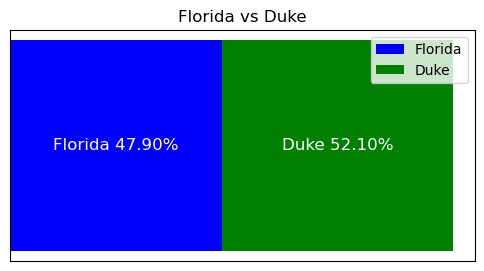

In [14]:
import numpy as np

def head_to_head_probability(merged_df, team_a, team_b):
    """
    Calculates the probability of Team A winning against Team B 
    based on their VEGsemble probabilities from merged_df.
    
    Args:
    merged_df (pd.DataFrame): DataFrame containing 'Team' and 'VEGsemble_Prob' columns.
    team_a (str): Name of Team A
    team_b (str): Name of Team B
    
    Returns:
    dict: Probabilities of each team winning
    """
    # Lookup probabilities from merged_df
    prob_a = merged_df.loc[merged_df['Team'] == team_a, 'VEGsemble_Prob'].values
    prob_b = merged_df.loc[merged_df['Team'] == team_b, 'VEGsemble_Prob'].values

    # Ensure both teams exist in merged_df
    if len(prob_a) == 0 or len(prob_b) == 0:
        return f"Error: One or both teams not found in merged_df."

    # Extract actual probability values
    prob_a = prob_a[0]
    prob_b = prob_b[0]

    # Normalize probabilities
    total = prob_a + prob_b
    win_prob_a = prob_a / total
    win_prob_b = prob_b / total

    return {
        f"{team_a} Win Probability": round(win_prob_a, 4),
        f"{team_b} Win Probability": round(win_prob_b, 4)
    }

def gauge_chart(merged_df, team_a, team_b):
    """
    Displays a gauge chart to represent head-to-head win probability.
    """
    result = head_to_head_probability(merged_df, team_a, team_b)
    prob_a = list(result.values())[0]  # Team A's probability

    fig, ax = plt.subplots(figsize=(6, 3))
    
    # Gauge (half-circle)
    ax.barh(1, prob_a, left=0, color="blue", height=0.3, label=team_a)
    ax.barh(1, 1 - prob_a, left=prob_a, color="green", height=0.3, label=team_b)
    
    # Text labels
    plt.text(prob_a / 2, 1, f"{team_a} {prob_a:.2%}", ha='center', va='center', color="white", fontsize=12)
    plt.text(prob_a + (1 - prob_a) / 2, 1, f"{team_b} {1 - prob_a:.2%}", ha='center', va='center', color="white", fontsize=12)
    
    # Title & cleanup
    plt.title(f"{team_a} vs {team_b}")
    plt.yticks([])
    plt.xticks([])
    plt.legend()
    
    plt.show()

# Display the title
display(Markdown("##  🚀🚀🚀🚀 Ryan's VEGsemble H2H 🚀🚀🚀🚀"))
gauge_chart(merged_df, team_a, team_b)